In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import dataPrep as dp

In [116]:
data = pd.read_csv('insurance.csv')

In [117]:
# Top 5 Rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [118]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [119]:
# Last 5 Rows
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [120]:
# Random 5 Rows
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
591,47,male,19.57,1,no,northwest,8428.0693
771,53,female,26.70,2,no,southwest,11150.7800
515,58,male,35.70,0,no,southwest,11362.7550
213,34,female,26.73,1,no,southeast,5002.7827
796,30,male,44.22,2,no,southeast,4266.1658


In [121]:
data.shape

(1338, 7)

In [122]:
# chick Null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [123]:
# Get all data about your dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [124]:
# Get the statistic about the data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [125]:
# Number of uniqe values in each feature
for column in data.columns:
    print(data[column].nunique())

47
2
548
6
2
4
1337


In [126]:
# Knowing numerical data from data that we will do encode on it
str=[]
num=[]
for column in data.columns:
    if data[column].nunique() > 10:
        num.append(column)
    else:
        str.append(column)

In [127]:
num

['age', 'bmi', 'charges']

In [128]:
str

['sex', 'children', 'smoker', 'region']

<Axes: ylabel='region'>

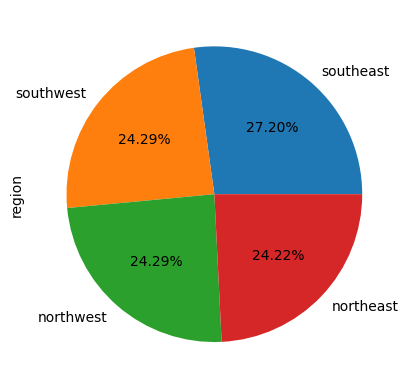

In [129]:
# Find the effect of region on Charges 
data['region'].value_counts().plot(kind="pie",autopct="%1.2f%%")

<Axes: >

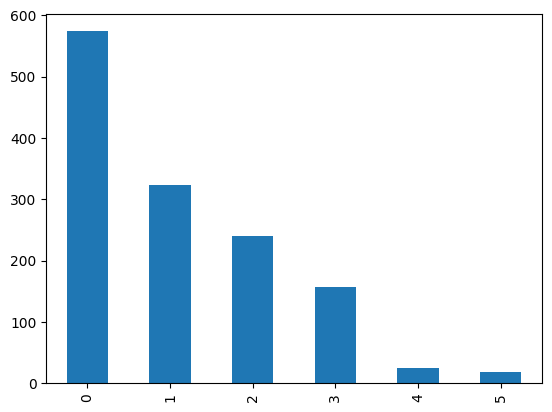

In [130]:
# Find Charges among Number of childrens
data['children'].value_counts().plot(kind="bar") 

<Axes: >

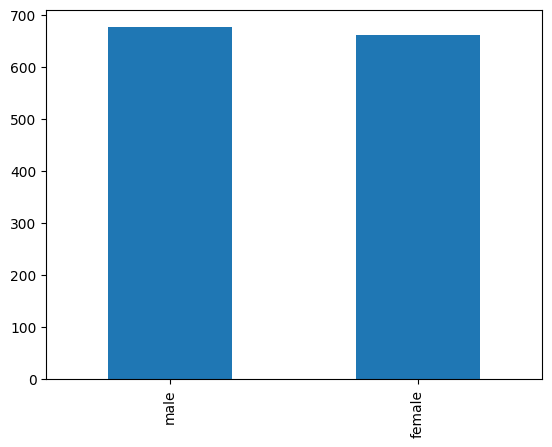

In [131]:
# The most influential gender on Charges
data['sex'].value_counts().plot(kind="bar")


C:\Users\Aalan\AppData\Local\Temp\ipykernel_17960\4253761362.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


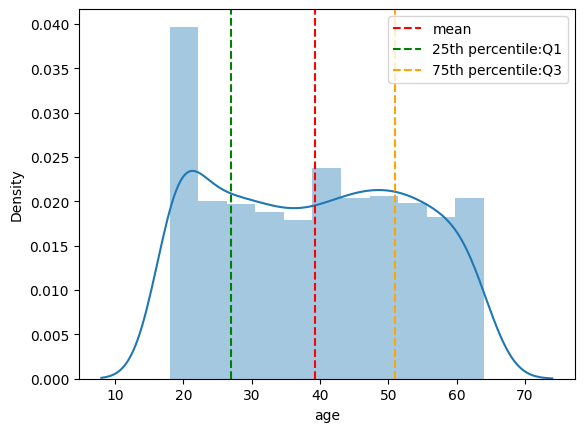

In [132]:
# the Numerical distribution of the age 
sns.distplot(data['age'])
plt.axvline(x=np.mean(data['age']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(data['age'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(data['age'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

The distribution of the age show that there are outlines in range of age (8-22) , 
mean =~ 39 , 
25th , 75th precentiles =~ 28 , 51 respectivly

In [133]:
data['age'].skew()

0.05567251565299186

<Axes: ylabel='age'>

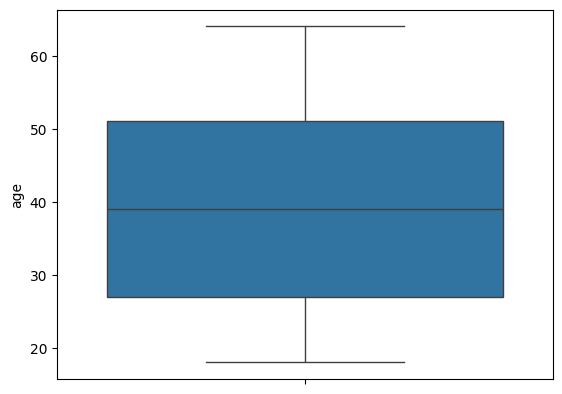

In [134]:
sns.boxplot(data['age'])

C:\Users\Aalan\AppData\Local\Temp\ipykernel_17960\2363349499.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

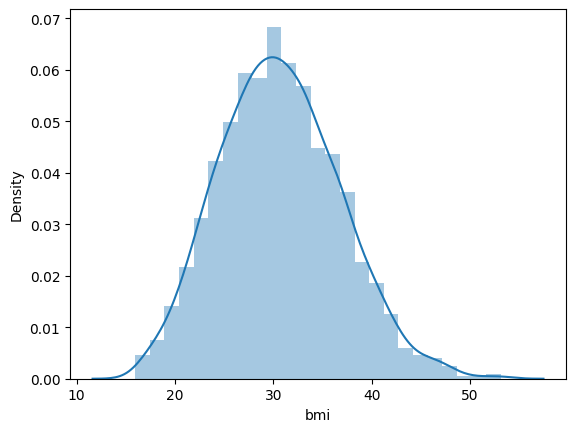

In [135]:
# the Numerical distribution of the bmi
sns.distplot(data['bmi'])

In [136]:
data['bmi'].skew()

0.2840471105987448

<Axes: ylabel='bmi'>

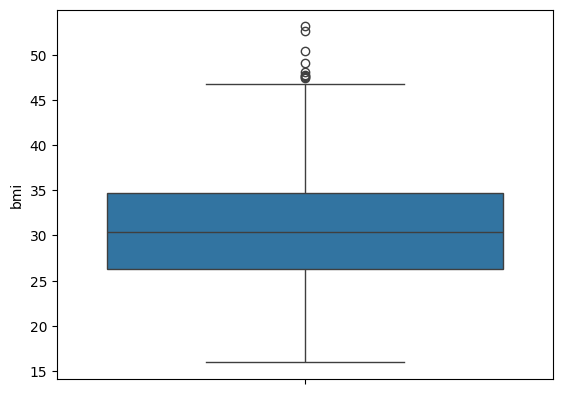

In [137]:
sns.boxplot(data['bmi'])

ther are outlines over than ~47  ,  25th,75th percentile =~ 26,35 

<Axes: xlabel='age', ylabel='charges'>

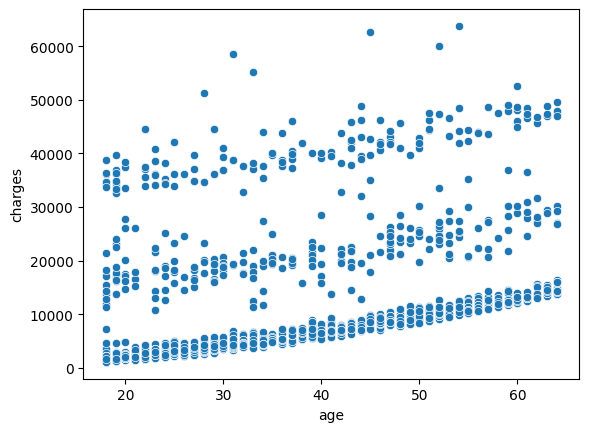

In [138]:
sns.scatterplot(x=data['age'],y=data['charges'])

<Axes: xlabel='smoker', ylabel='bmi'>

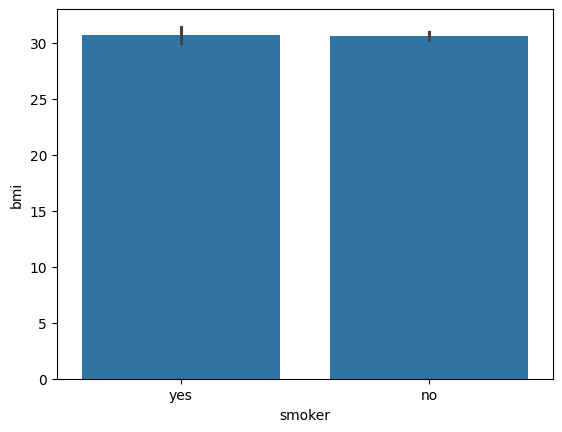

In [139]:
# the affect of if person smoker for bmi
sns.barplot(x=data['smoker'],y=data['bmi'])

No effect 

<Axes: xlabel='smoker', ylabel='age'>

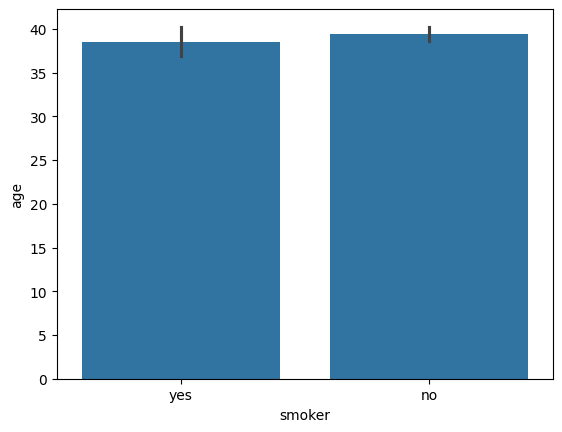

In [140]:
# relation bettwen if the person is smoker and age
sns.barplot(x=data['smoker'],y=data['age'])

<Axes: xlabel='smoker', ylabel='bmi'>

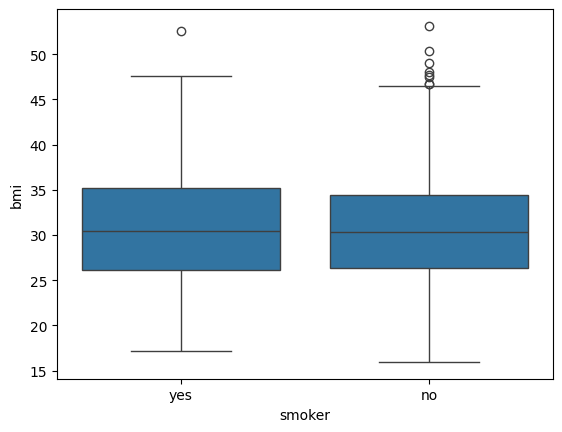

In [141]:
sns.boxplot(x=data['smoker'],y=data['bmi'])

In [142]:
# Relation bettwen Region and number od children 
pd.crosstab(data['region'],data['children'])

children,0,1,2,3,4,5
region,,,,,,
northeast,147,77,51,39,7,3
northwest,132,74,66,46,6,1
southeast,157,95,66,35,5,6
southwest,138,78,57,37,7,8


<Axes: xlabel='children', ylabel='region'>

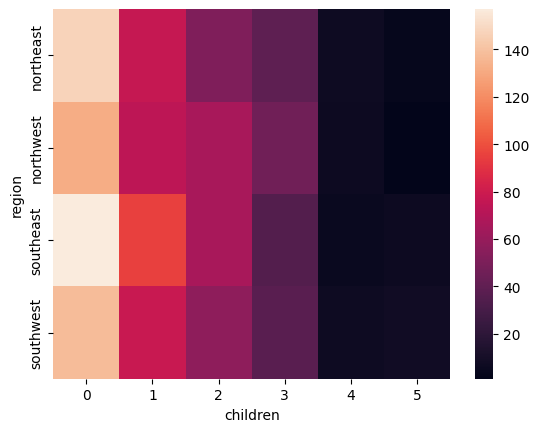

In [143]:
sns.heatmap(pd.crosstab(data['region'],data['children']))

In [144]:

data=dp.delete_missingData(data)

In [145]:

#example for cleanup list
cleanup_data = {1:     {"male": 1, "female": 0},
                4: {"yes": 1, "no": 0},
                5: {"southeast":1, "northwest":0,"southwest":2,"northeast":3}}

data=dp.scratch_manual_encoding(data,cleanup_data)

In [146]:


data=dp.scratch_labelEncoding(data,"sex")
data=dp.scratch_labelEncoding(data,"smoker")
data=dp.scratch_labelEncoding(data,"region")
print(data)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [147]:

data_x=data.drop(['charges'],axis=1).values
data_y=data['charges'].values

In [148]:
import numpy as np

def fit(X,y,numOfIteration,learning_rate):
    n_samples,n_features=X.shape
    #initalize the weights and bias to zero
    weights=np.zeros((n_features,1))
    bias=0

    for _ in range(numOfIteration):
        # set the equation of the linear regression by multiply the weights to the X_trained_scaled
        y_pred=np.dot(X,weights) +bias

        # get the gradient of the weights and bias

        dw = (1/n_samples) * np.dot(X.T,(y_pred-y))
        dp=(1/n_samples) * np.sum(y_pred-y)
        # update the weigths and bias in every iteration
        weights-=learning_rate*dw
        bias-=learning_rate*dp

    return weights,bias

def predict(X,weights,bias):
    # get the predict value of the model
    y_pred=np.dot(X,weights) + bias
    return y_pred
  
# normalize function applied to use it to make fit_transform of the x_data and y_data and make the length of the featured  data is one


0.7504778595159706
0.00931646955231252


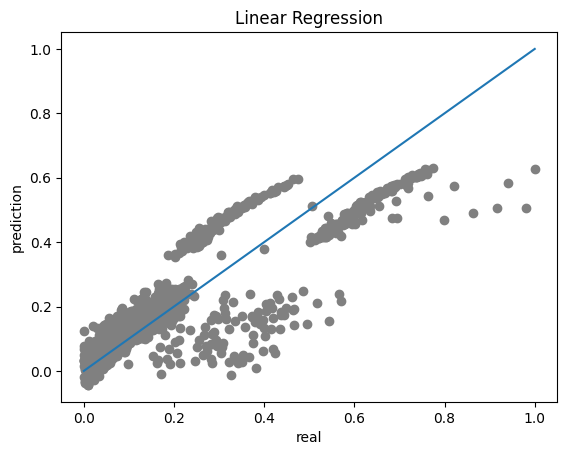

In [149]:
data_x= dp.scratch_normalization_minMax(data_x)
data_y= dp.scratch_normalization_minMax(data_y.reshape(-1,1))

weights, bias = fit(data_x, data_y,numOfIteration=10000,learning_rate=0.01)
# get the weights and bias to get the predict data
y_pred = predict(data_x, weights, bias)

from sklearn.metrics import mean_squared_error,r2_score

# get the score and mean squared error of the model 
scoring=r2_score(data_y,y_pred)
mean_square_error=mean_squared_error(data_y,y_pred)

print(scoring)
print(mean_square_error)

import matplotlib.pyplot as plt

plt.scatter(data_y, y_pred, color='gray')
plt.plot([min(data_y), max(data_y)], [min(data_y), max(data_y)])
plt.xlabel('real')
plt.ylabel('prediction')
plt.title('Linear Regression')
plt.show()